In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data/datagastos_2003_2022.csv", encoding='ISO-8859-1', delimiter=';')
df.head()

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC
0,02/01/2003,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
1,02/01/2003,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
2,02/01/2003,***.868.251-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N
3,03/01/2003,***.004.131-**,5.927170e+11,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVIOS DE TERCEIROS-PESSOA JURÖDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N
4,03/01/2003,***.004.131-**,8.393080e+11,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N


In [39]:
#Verificar o total de linhas e colunas
df.shape

(113342, 8)

In [46]:
#Veriricar informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DATA PGTO               113340 non-null  object 
 1   CPF SERVIDOR            113340 non-null  object 
 2   CPF/CNPJ FORNECEDOR     112906 non-null  float64
 3   NOME FORNECEDOR         113340 non-null  object 
 4   VALOR                   113340 non-null  object 
 5   TIPO                    113340 non-null  object 
 6   SUBELEMENTO DE DESPESA  113340 non-null  object 
 7   CDIC                    113340 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.8+ MB


In [41]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

,0
DATA PGTO,0
CPF SERVIDOR,2
CPF/CNPJ FORNECEDOR,436
NOME FORNECEDOR,2
VALOR,2
TIPO,2
SUBELEMENTO DE DESPESA,2
CDIC,2


In [42]:
#Verificar o percentual dos dados nulos
(df.isnull().sum() / len(df)) * 100

,0
DATA PGTO,0.000000
CPF SERVIDOR,0.001765
CPF/CNPJ FORNECEDOR,0.384676
NOME FORNECEDOR,0.001765
VALOR,0.001765
TIPO,0.001765
SUBELEMENTO DE DESPESA,0.001765
CDIC,0.001765


In [59]:
#Remoção de dados com valores negativos
df = df.dropna(subset=["VALOR"])

In [44]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

,0
DATA PGTO,0
CPF SERVIDOR,0
CPF/CNPJ FORNECEDOR,434
NOME FORNECEDOR,0
VALOR,0
TIPO,0
SUBELEMENTO DE DESPESA,0
CDIC,0


In [48]:
df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário


In [60]:
# Convertendo a coluna 'DATA PGTO' para datetime
#df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário
df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Criar colunas separadas para o dia, mês e ano
df['DIA PGTO'] = df['DATA PGTO'].dt.day
df['MES PGTO'] = df['DATA PGTO'].dt.month
df['ANO PGTO'] = df['DATA PGTO'].dt.year

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  float64       
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113340 non-null  object        
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB
None


,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
0,2003-01-02,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
1,2003-01-02,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
2,2003-01-02,***.868.251-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
3,2003-01-03,***.004.131-**,5.927170e+11,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVIOS DE TERCEIROS-PESSOA JURÖDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
4,2003-01-03,***.004.131-**,8.393080e+11,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
113335,2022-12-03,***.136.591-**,1.726166e+13,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,"179,5",C,FORNECIMENTO DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113336,2022-12-03,***.136.591-**,3.987994e+13,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,"54,95",C,GENEROS DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113337,2022-12-04,***.136.591-**,4.750841e+13,COMPANHIA BRASILEIRA DE DISTRIBUIÇO,"518,07",C,GENEROS DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022
113338,2022-12-04,***.136.591-**,1.255044e+13,RESTAURANTE SOHO,"330,52",C,FORNECIMENTO DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022


In [61]:
#Converter os valores para posterior realização de cálculos

# Remover 'R$', substituir ponto (milhar) por vazio e a vírgula por ponto (decimal)
df['VALOR'] = df['VALOR'].str.replace('R$', '')   # Remove 'R$'
df['VALOR'] = df['VALOR'].str.replace('.', '')    # Remove o separador de milhar
df['VALOR'] = df['VALOR'].str.replace(',', '.')   # Substitui a vírgula decimal por ponto

# Converter para tipo numérico (float)
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce')

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  float64       
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 9.1+ MB
None


,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
0,2003-01-02,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,1696.90,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
1,2003-01-02,***.010.008-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,1336.60,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
2,2003-01-02,***.868.251-**,3.134920e+13,JW TRANSPORTADORA TURÖSTICA,1396.43,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
3,2003-01-03,***.004.131-**,5.927170e+11,FLORES ALVORADA,8585.00,C,OUTROS SERVIOS DE TERCEIROS-PESSOA JURÖDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
4,2003-01-03,***.004.131-**,8.393080e+11,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,251.50,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
113335,2022-12-03,***.136.591-**,1.726166e+13,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,179.50,C,FORNECIMENTO DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113336,2022-12-03,***.136.591-**,3.987994e+13,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,54.95,C,GENEROS DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113337,2022-12-04,***.136.591-**,4.750841e+13,COMPANHIA BRASILEIRA DE DISTRIBUIÇO,518.07,C,GENEROS DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022
113338,2022-12-04,***.136.591-**,1.255044e+13,RESTAURANTE SOHO,330.52,C,FORNECIMENTO DE ALIMENTAÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022


In [65]:
# Converter a coluna 'CPF/CNPJ FORNECEDOR' para string
df['CPF/CNPJ FORNECEDOR'] = df['CPF/CNPJ FORNECEDOR'].astype(str)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     113340 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB


In [68]:
df.sample(20)

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
78545,2014-02-10,***.216.641-**,8998246000106.0,BOURBON IBIRAPUERA HOTEL & CONVENTION,299.25,C,HOSPEDAGENS,00150.000096/2014-04.R.08.25/01/2014.31/12/2014.N,10,2,2014
109103,2021-09-20,***.796.221-**,672600000104.0,MERCADINHO LA PALMA LTDA,251.97,C,GENEROS DE ALIMENTAÇO,00140.000733/2021-82.R.08.26/08/2021.31/12/2022.N,20,9,2021
59653,2010-06-16,***.570.341-**,4382818000339.0,CIA TROPICAL DE HOTEIS AMAZONIA,699.00,C,HOSPEDAGENS,00150.000898/2010-82.R.08.25/05/2010.31/12/2014.N,16,6,2010
56094,2010-01-26,***.582.401-**,92784537000108.0,PREDIAL E ADMINISTRADORA HOTEIS PLAZA S/A-SAN...,480.00,C,HOSPEDAGENS,00150.000049/2010-29.R.08.28/12/2009.31/12/2014.N,26,1,2010
46955,2009-01-16,***.271.561-**,394502002864.0,HOTEL DE TRANSITO DA MARINHA EM INEMA,240.00,D,HOSPEDAGENS,00150.000026/2009-81.R.08.29/12/2008.31/12/2014.N,16,1,2009
65231,2010-12-12,***.455.101-**,8998246000106.0,BOURBON IBIRAPUERA HOTEL & CONVENTION,378.00,C,HOSPEDAGENS,00150.001806/2010-81.R.08.27/11/2010.31/12/2014.N,12,12,2010
74183,2012-12-06,***.004.131-**,839308000125.0,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,736.80,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,00024.000349/2012-15.R.08.26/11/2012.31/12/2014.N,6,12,2012
39720,2008-04-11,***.270.201-**,33000118000179.0,TELEMAR NORTE LESTE S/A,308.54,D,SERVIOS DE TELECOMUNICAåES,00200.001498/2008-37.R.08.26/03/2008.31/12/2014.N,11,4,2008
58987,2010-05-28,***.271.561-**,1436319000208.0,NOVA RIOTEL EMPREENDIMENTOS HOTELEIROS LTDA,701.50,C,HOSPEDAGENS,00150.000867/2010-21.R.08.25/05/2010.31/12/2014.N,28,5,2010
111053,2022-02-24,***.136.591-**,61585865039287.0,RAIA DROGASIL SA,31.90,C,MATERIAL FARMACOLOGICO,00264.000089/2022-27.R.08.23/02/2022.31/12/2022.N,24,2,2022


Análise dos Dados

O que queremos responder?
- Despesas por período, por tipo e por subelemento


In [74]:
#Despesas por ano

# Agrupar por 'ANO PGTO' e somar os valores
despesas_por_ano = df.groupby('ANO PGTO')['VALOR'].sum().reset_index()

# Exibir o resultado
print(despesas_por_ano)

    ANO PGTO       VALOR
0       2003  5327599.63
1       2004  6541238.37
2       2005  5204035.80
3       2006  4977941.73
4       2007  3857905.40
5       2008  6084616.50
6       2009  5438905.30
7       2010  6557394.19
8       2011  4587842.43
9       2012  4598570.59
10      2013  6022006.62
11      2014  9305096.62
12      2015  5706943.28
13      2016  4192262.08
14      2017  4003637.84
15      2018  4866043.60
16      2019  5382478.10
17      2020  7314318.09
18      2021  9927562.29
19      2022  4997298.75


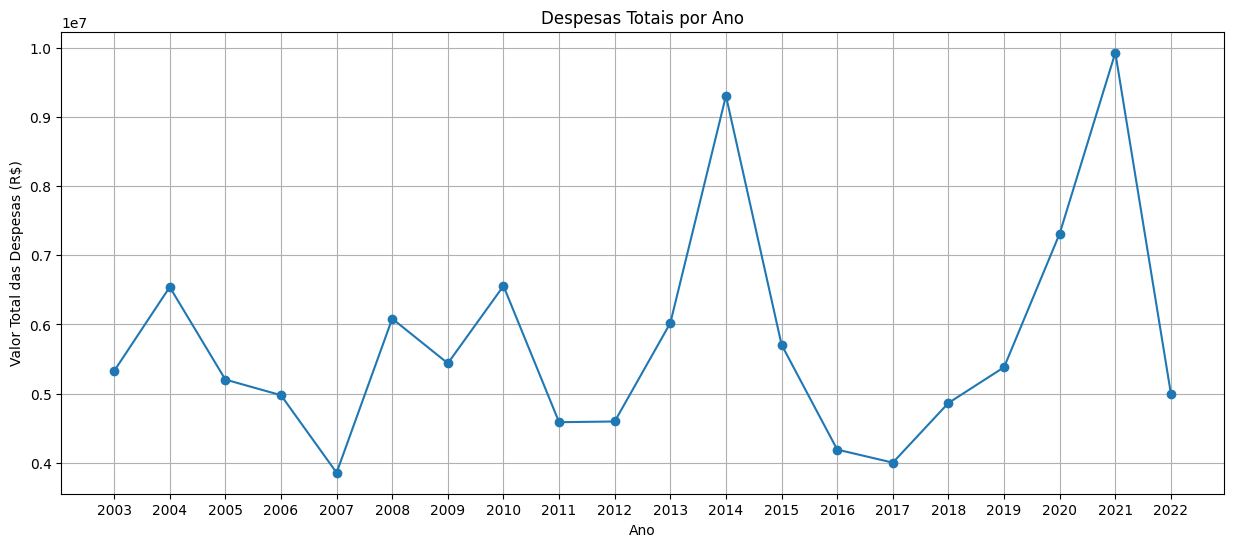

In [77]:
# Criar o gráfico de linhas
plt.figure(figsize=(15, 6))
plt.plot(despesas_por_ano['ANO PGTO'], despesas_por_ano['VALOR'], marker='o')

# Adicionar título e rótulos
plt.title('Despesas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total das Despesas (R$)')
plt.grid()
plt.xticks(despesas_por_ano['ANO PGTO'])  # Para mostrar todos os anos no eixo x

# Mostrar o gráfico
plt.show()

In [79]:
#Despesas por subelemento

# Agrupar por 'SUBELEMENTO DE DESPESA' e somar os valores
despesas_por_subelemento = df.groupby('SUBELEMENTO DE DESPESA')['VALOR'].sum().reset_index()

# Ordenar os resultados do maior para o menor (opcional)
despesas_por_subelemento = despesas_por_subelemento.sort_values(by='VALOR', ascending=False)

# Exibir o resultado
print(despesas_por_subelemento)

                         SUBELEMENTO DE DESPESA        VALOR
32                                  HOSPEDAGENS  55397350.65
31                       GENEROS DE ALIMENTAÇO  17150004.28
28                  FORNECIMENTO DE ALIMENTAÇO  14753514.55
35               LOCACAO DE MEIOS DE TRANSPORTE  11257546.49
87   SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL   8189687.60
..                                          ...          ...
5                AQUISIÇO DE SOFTWARES DE BASE        35.60
99                    SERVIOS DE µGUA E ESGOTO        27.25
52                           MATERIAL BIOLàGICO        12.70
80                OUTRAS DESPESAS COM LOCOMOÇO        10.80
102                        SERVIOS JUDICIµRIOS         2.65

[112 rows x 2 columns]


<ipython-input-84-7ad4f9c9e0ac>:20: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()  # Ajusta o layout para evitar sobreposição


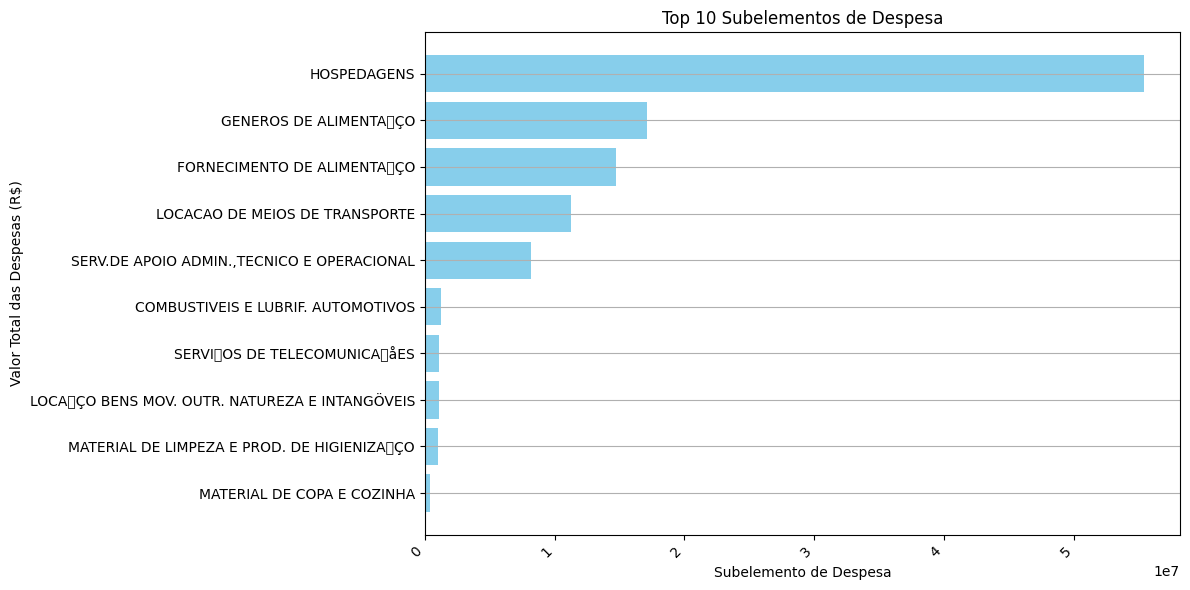

In [84]:
#TOP 10 Subelementos

# Ordenar por valor total e pegar os top 10 subelementos
top_10_subelementos = despesas_por_subelemento.sort_values(by='VALOR', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
plt.barh(top_10_subelementos['SUBELEMENTO DE DESPESA'][::-1], top_10_subelementos['VALOR'][::-1], color='skyblue')



# Adicionar título e rótulos
plt.title('Top 10 Subelementos de Despesa')
plt.xlabel('Subelemento de Despesa')
plt.ylabel('Valor Total das Despesas (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()